# Random Forest classifier
### Imports

In [137]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

import pydot
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load dataset

In [138]:
iris = datasets.load_iris()

print(f"feature names: {iris.feature_names}")
print(f"target names: {iris.target_names}")
print(iris.target)
print(iris.data)

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 

### Visualize dataset

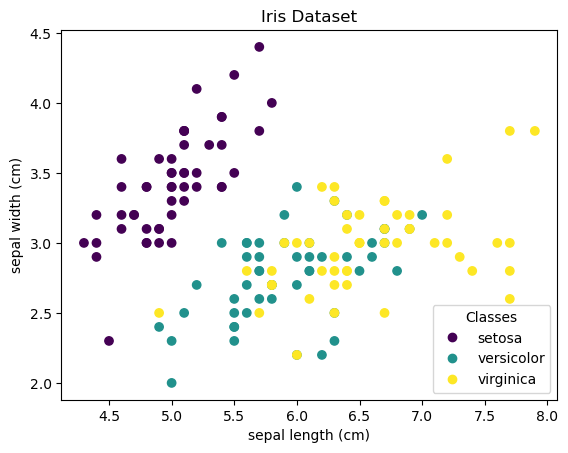

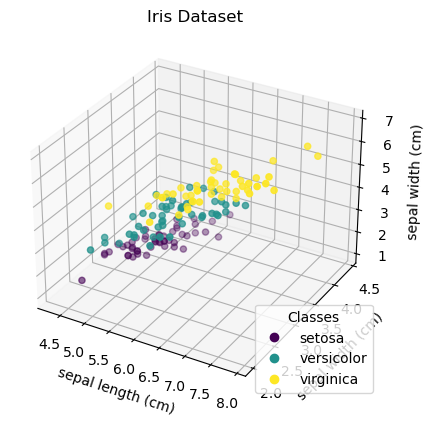

In [139]:
_, ax = plt.subplots()
#ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.title("Iris Dataset")
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], iris.data[:, 2], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], zlabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
plt.title("Iris Dataset")
plt.show()

### Train/test split

In [140]:
# X, y = datasets.load_iris( return_X_y = True)
X = iris.data
y = iris.target

# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

print(f"num train samples: {len(X_train)}")
print(f"num test samples: {len(X_test)}")

num train samples: 105
num test samples: 45


### Create and train classifier

In [141]:
clf = RandomForestClassifier(n_estimators = 100, max_features="sqrt")

clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt')

### Predictions

In [142]:
y_pred = clf.predict(X_test)

print()

# using metrics module for accuracy calculation
print("acc:", metrics.accuracy_score(y_test, y_pred))


acc: 0.9555555555555556


In [143]:
print(f"feature/variable names: {iris.feature_names}")
flower = [[3,3,1,4]]

clf.predict(flower)

feature/variable names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


array([2])

### Feature importance

In [144]:
pd.Series(clf.feature_importances_, index = iris.feature_names).sort_values(ascending=False)

petal width (cm)     0.501666
petal length (cm)    0.387971
sepal length (cm)    0.089167
sepal width (cm)     0.021197
dtype: float64

### Visualize trees
In order for this to work you need to install Graphviz for your OS ([Download installers](https://graphviz.org/download/)).

Exports and visualizes trees as pictures.

In [145]:
print(f"num trees: {len(clf.estimators_)}")

tree_indexes = np.random.random_integers(0,len(clf.estimators_),3)

for tree_index in tree_indexes:
    # Export the image to a dot file
    tree = clf.estimators_[tree_index]
    # Use dot file to create a graph
    export_graphviz(tree, out_file = 'tree.dot', feature_names = iris.feature_names, rounded = True, precision = 1)
    (graph, ) = pydot.graph_from_dot_file('tree.dot')
    graph.write_png(f'tree_{tree_index}.png')

num trees: 100


C:\Users\WHK\AppData\Local\Temp\ipykernel_17620\2293176089.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 100 + 1) instead
  tree_indexes = np.random.random_integers(0,len(clf.estimators_),3)
